In [1]:
#imports

import pandas as pd
from scipy.stats import linregress
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [3]:
columns=['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']
columns



['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [4]:

raw_df.iloc(axis=1)[4][::2]

0       0.538
2       0.469
4       0.469
6       0.458
8       0.458
        ...  
1002    0.573
1004    0.573
1006    0.573
1008    0.573
1010    0.573
Name: 4, Length: 506, dtype: float64

In [5]:

boston=pd.DataFrame()
for col in raw_df.columns:
    boston.insert(int(col), column=columns[int(col)], value=raw_df[col][::2])

boston=boston.reset_index(drop=True)
boston.insert(11,column=columns[11],value=raw_df[0][1::2].reset_index(drop=True))
boston.insert(12,column=columns[12],value=raw_df[1][1::2].reset_index(drop=True))
boston.insert(13,column=columns[13],value=raw_df[2][1::2].reset_index(drop=True))
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston_df={'data':data,
 'target':target,
 'dataset':boston
 }
boston_df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
boston.info()   # Check with daatatype of each independant features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
import requests
requests.get(data_url).content

b" The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\n prices and the demand for clean air', J. Environ. Economics & Management,\n vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n ...', Wiley, 1980.   N.B. Various transformations are used in the table on\n pages 244-261 of the latter.\n\n Variables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by

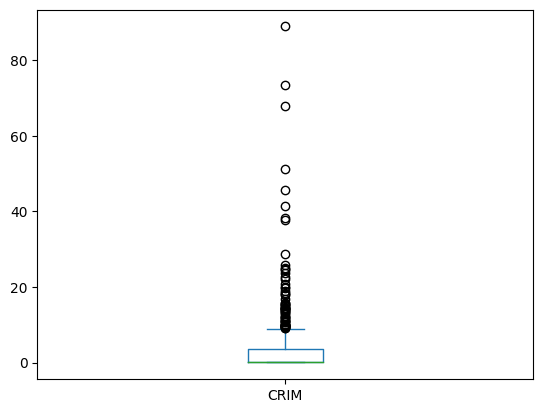

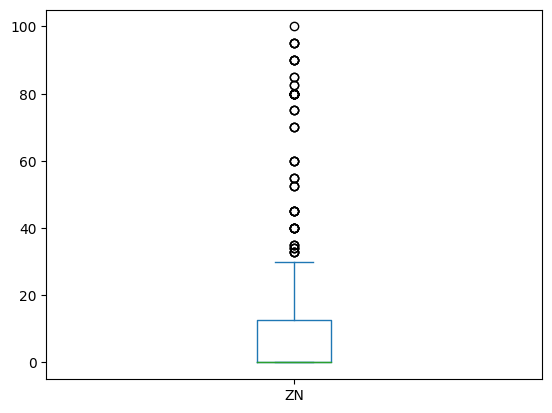

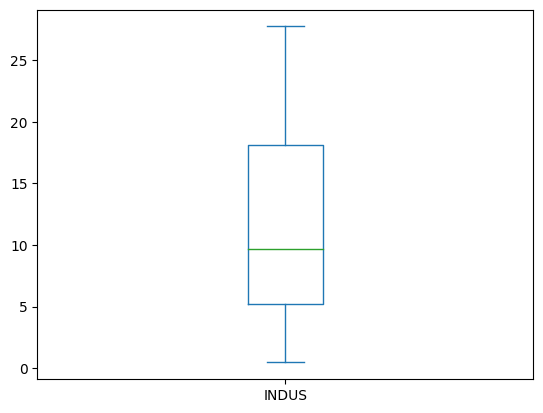

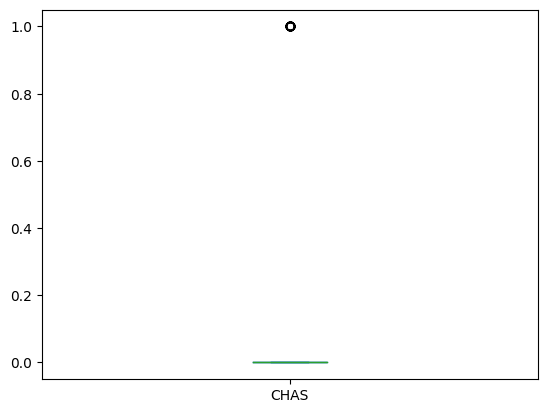

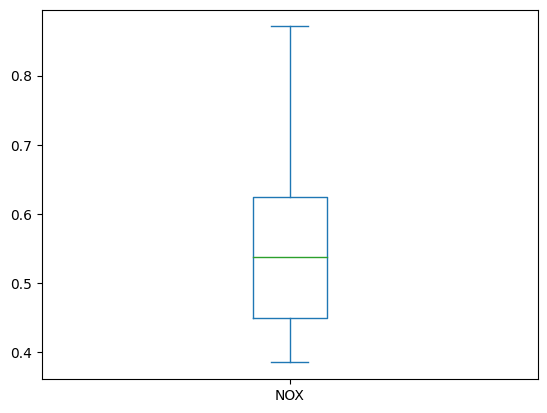

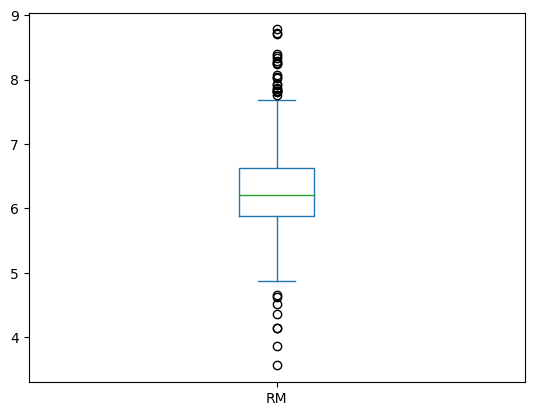

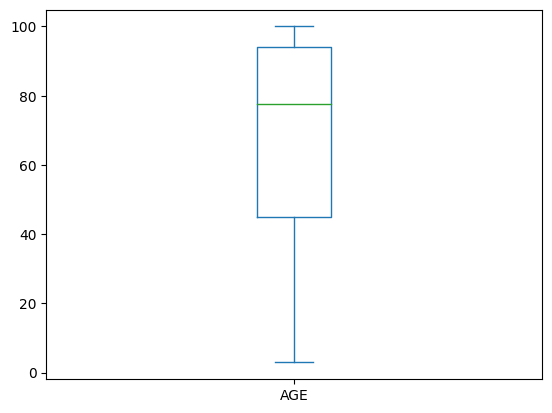

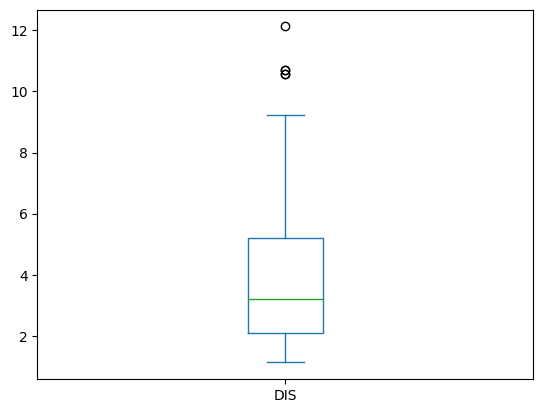

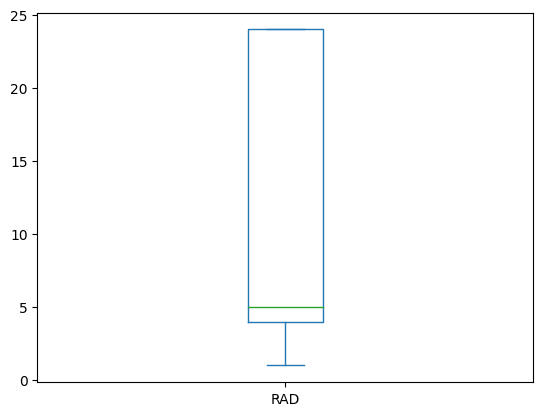

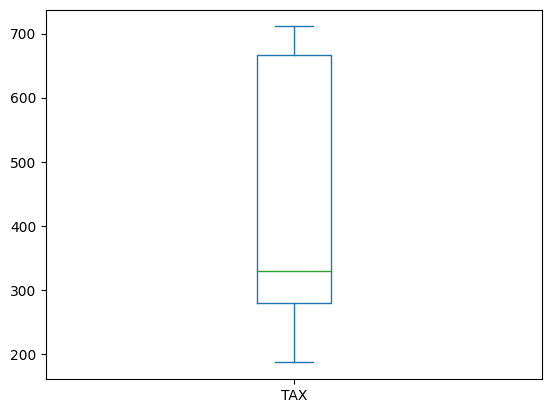

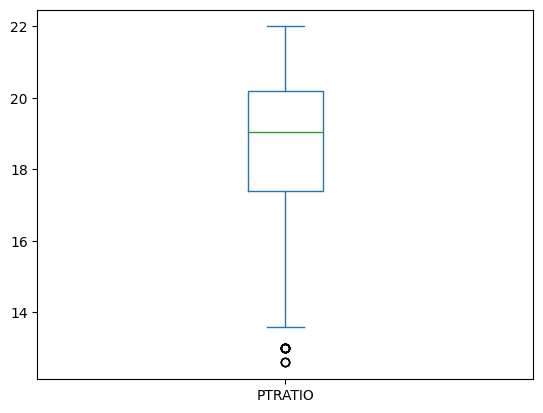

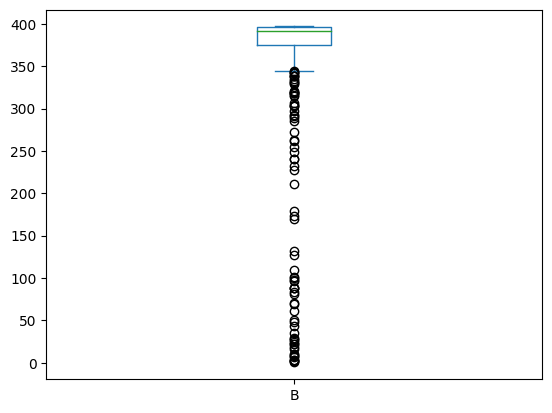

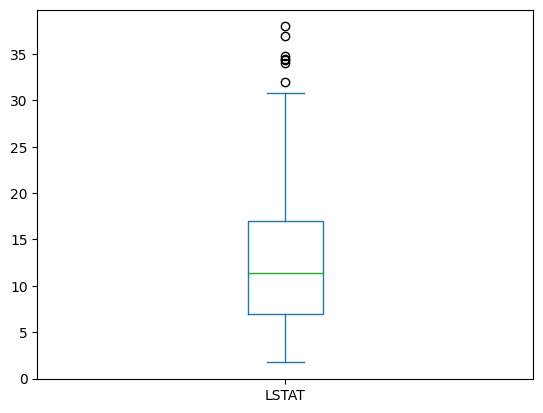

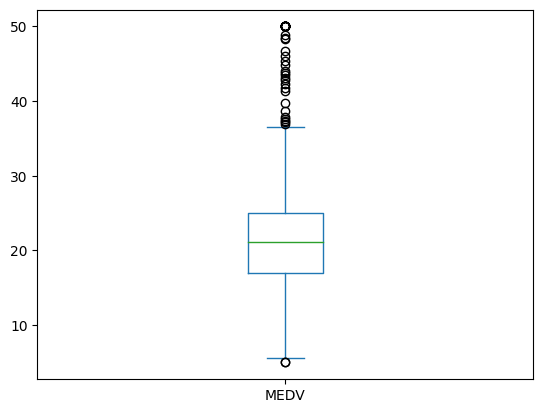

In [11]:
for col in boston.columns:
    boston[col].plot(kind='box')
    plt.show()

In [12]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


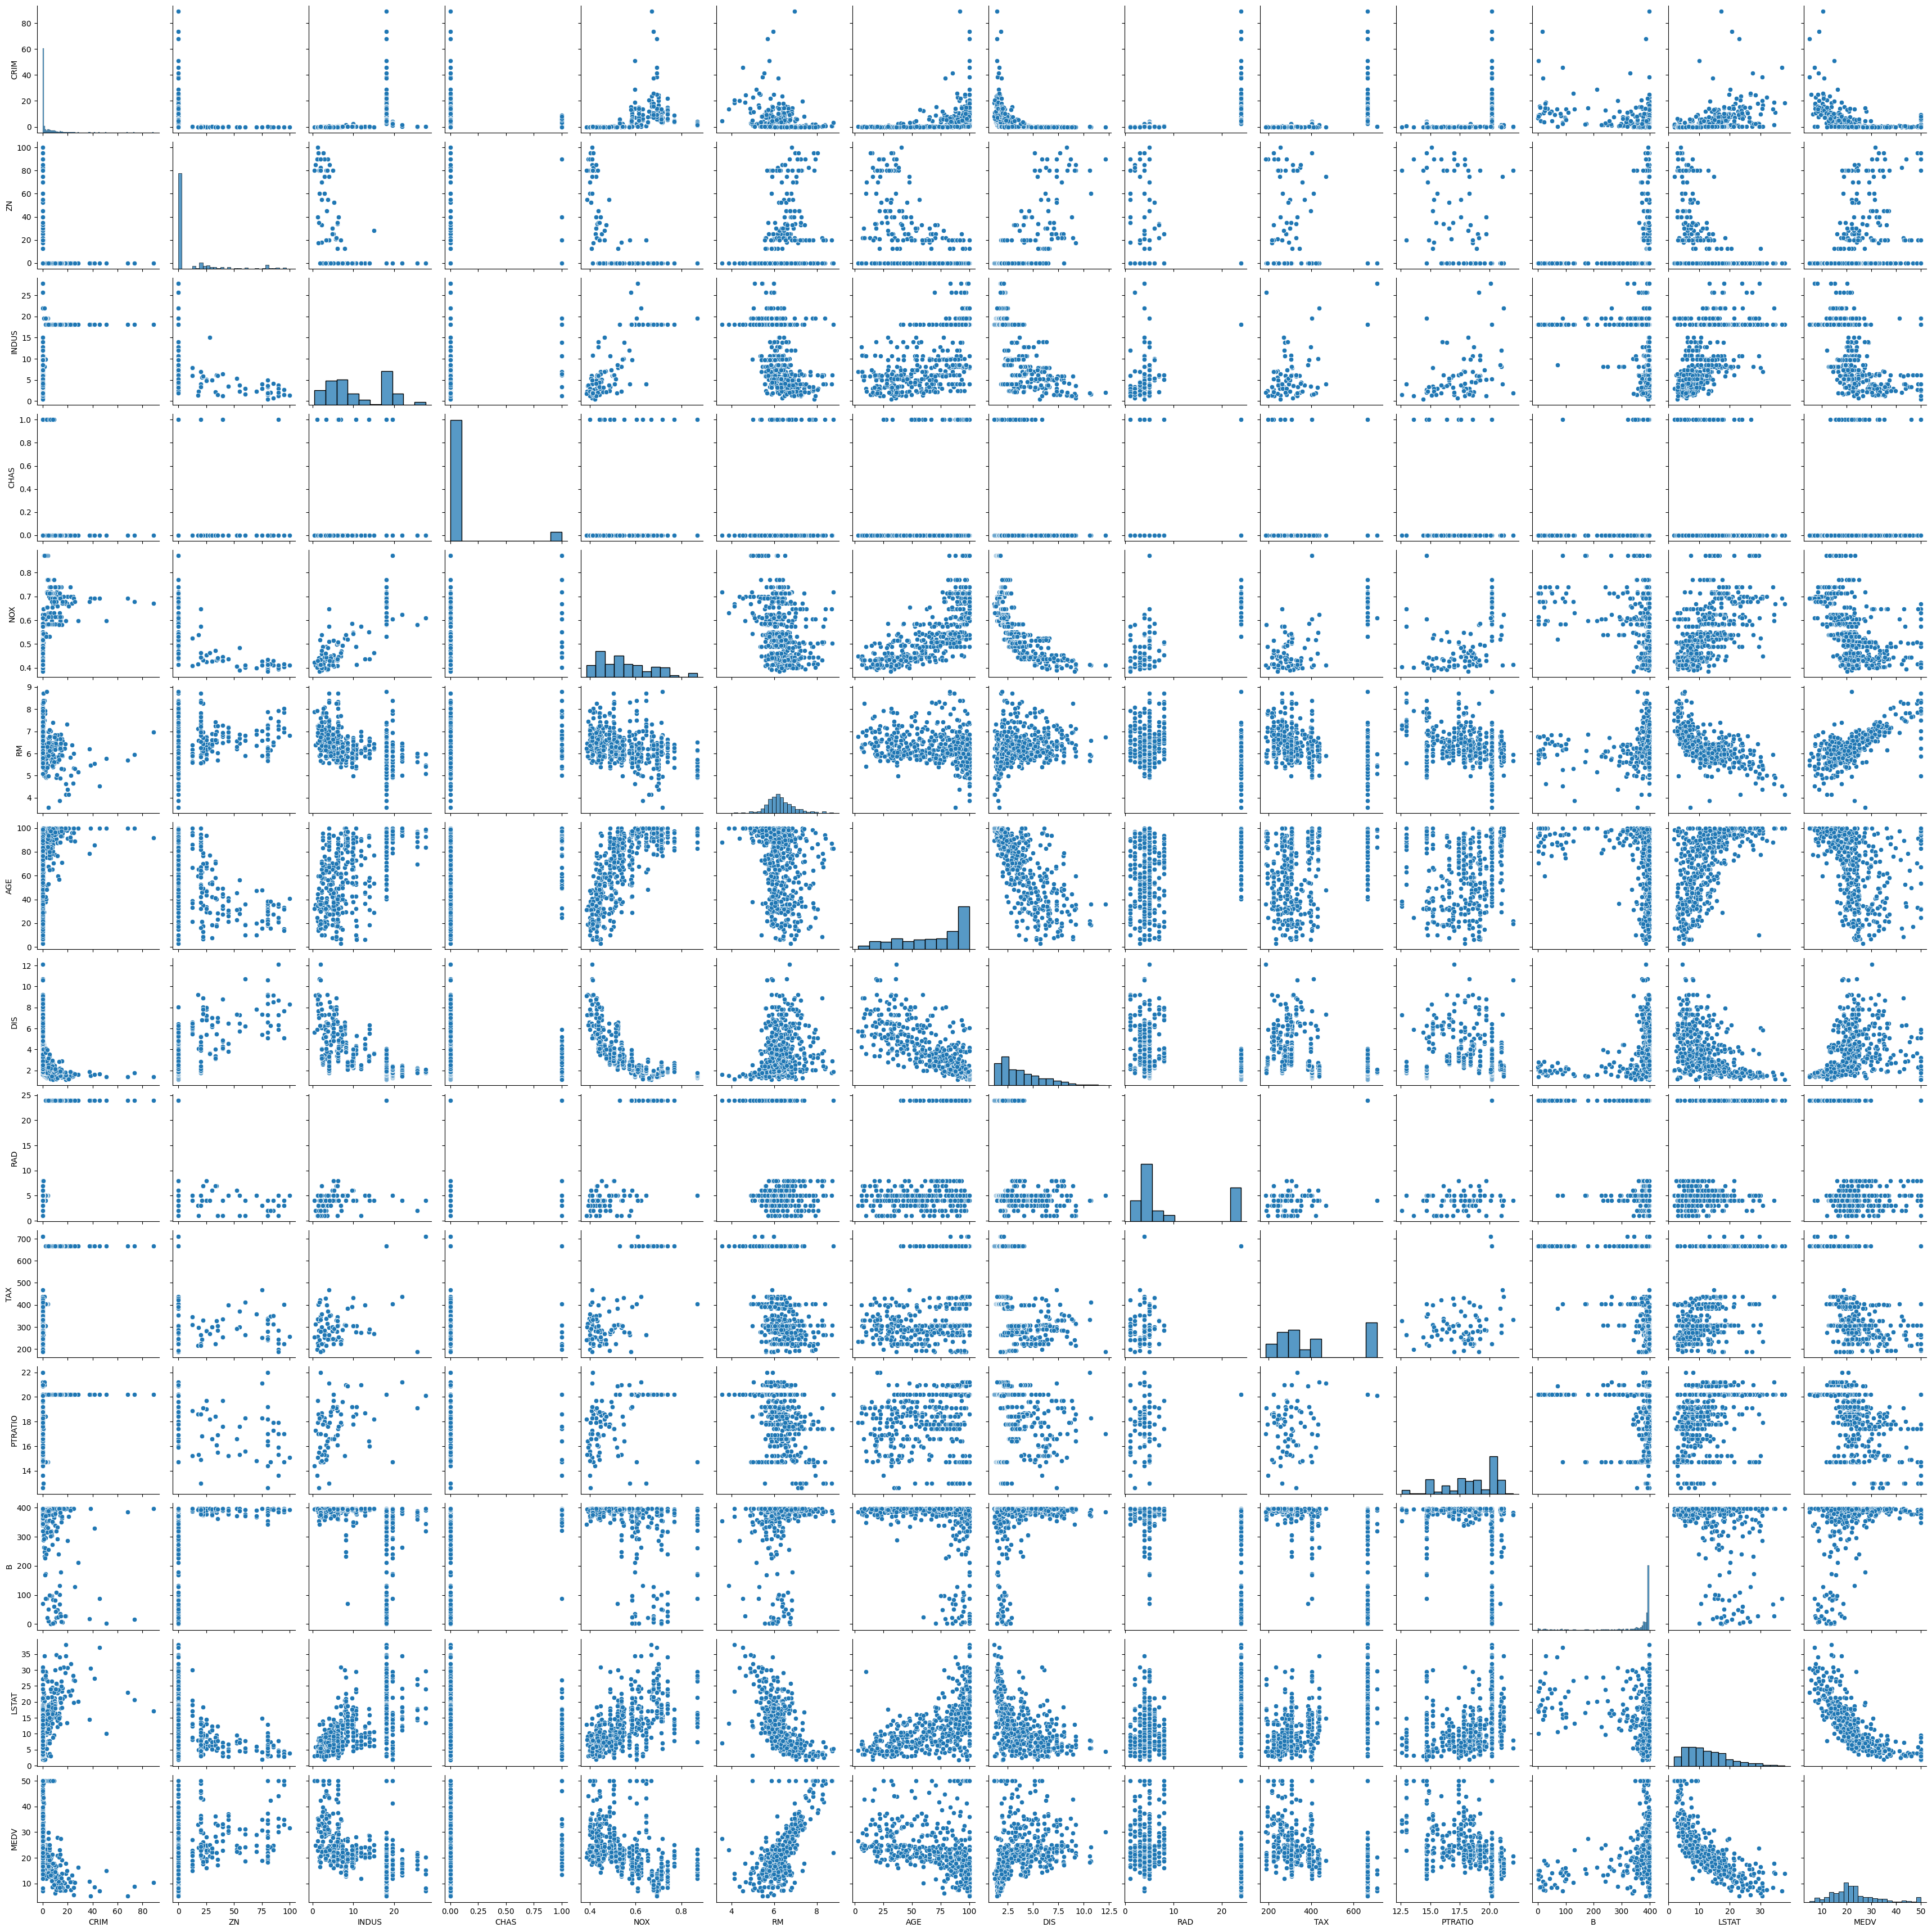

In [13]:
sns.pairplot(boston)

<Axes: >

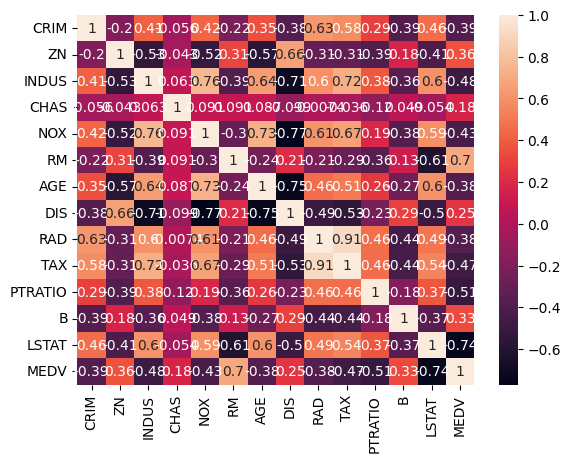

In [14]:
sns.heatmap(boston.corr(),annot=True)

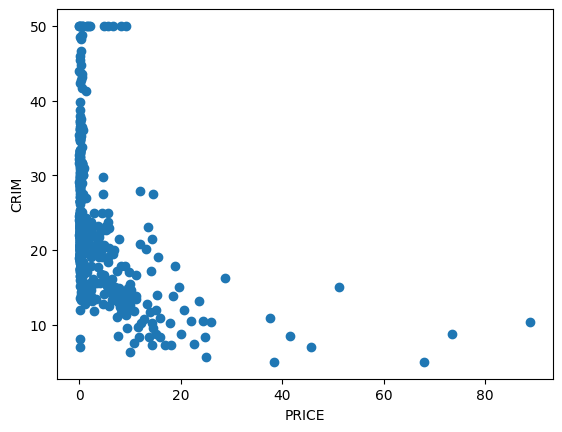

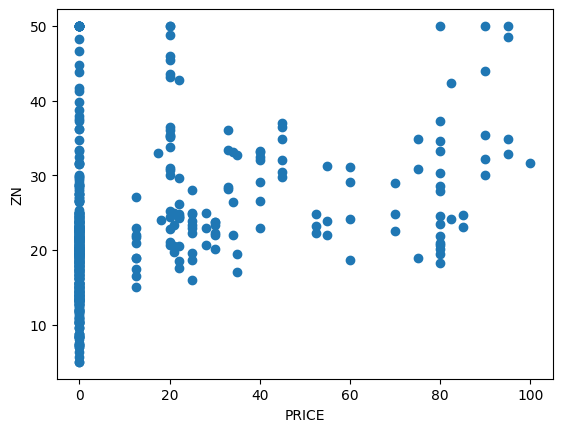

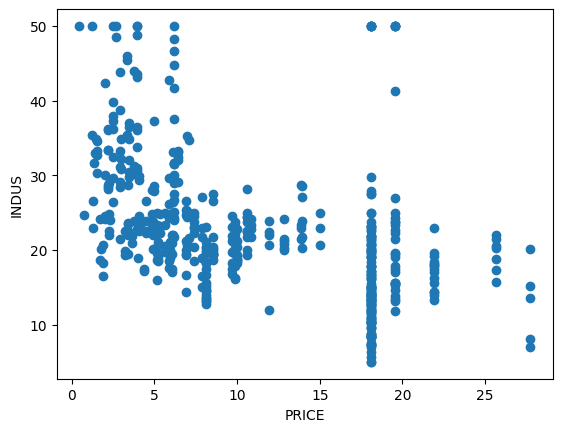

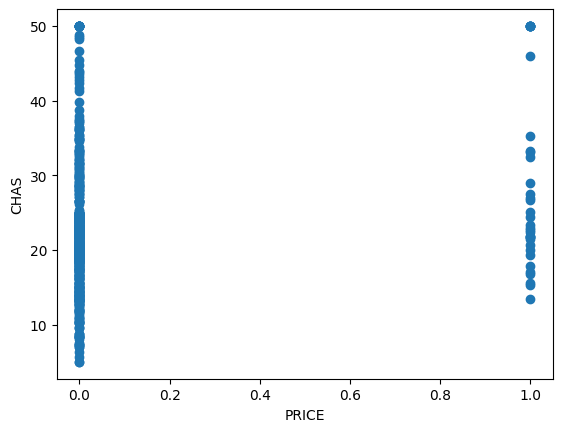

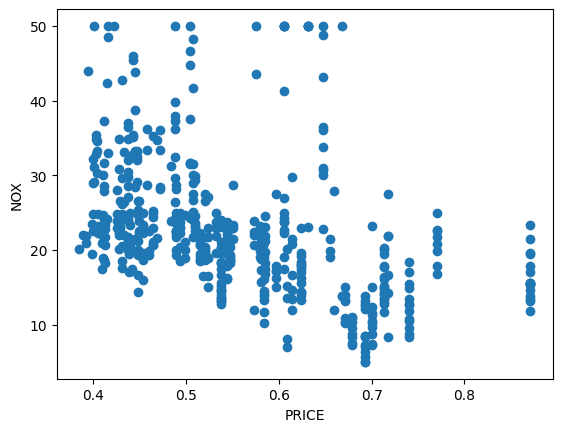

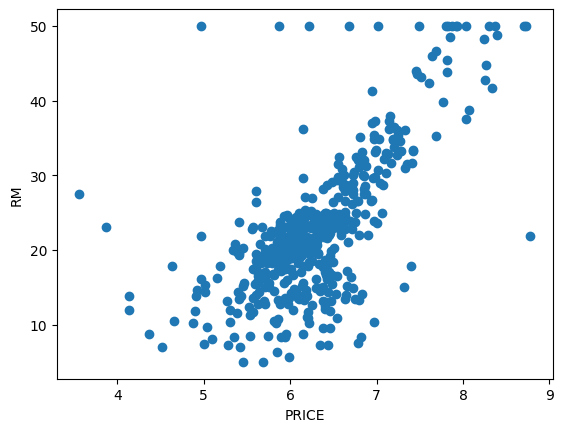

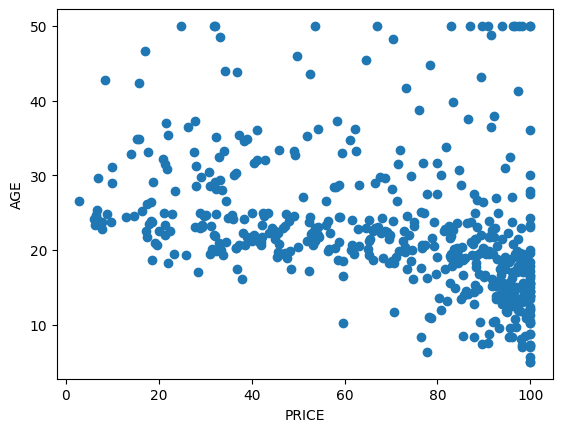

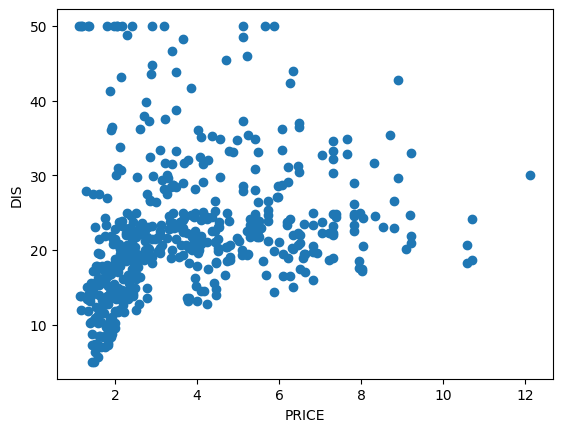

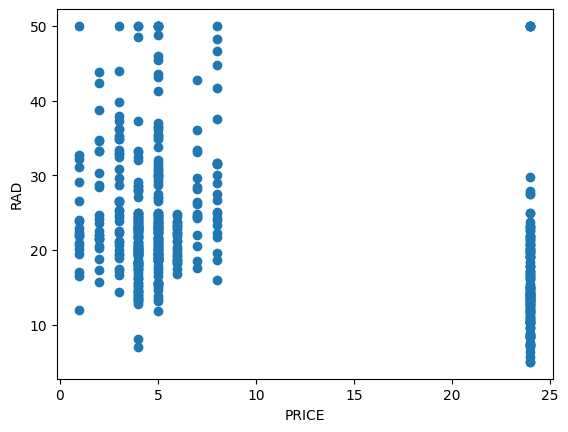

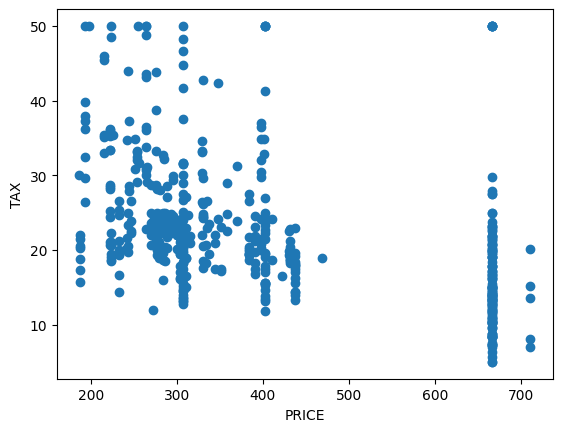

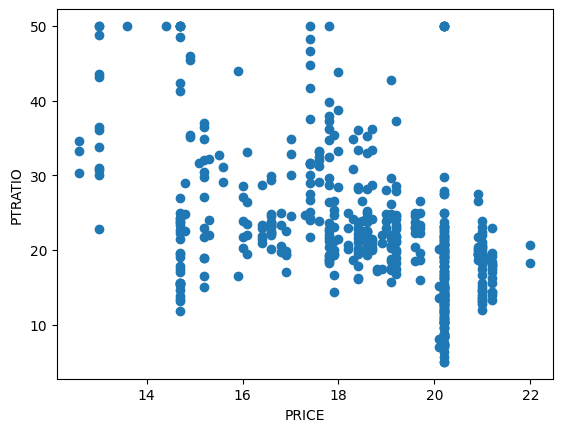

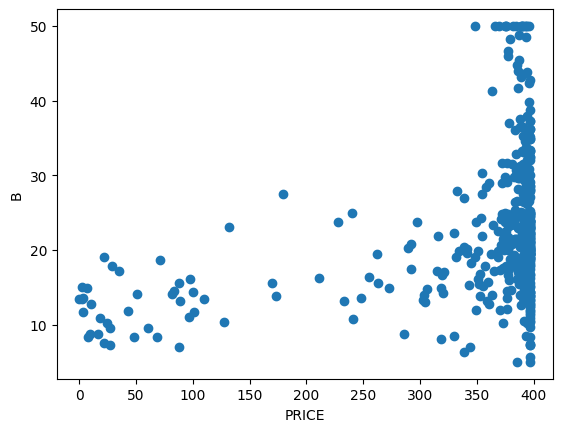

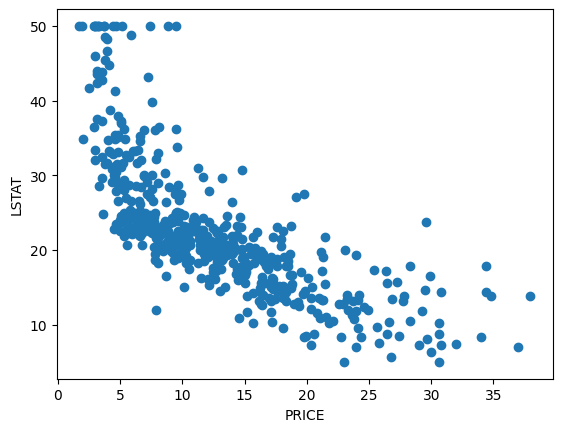

In [15]:
for i in columns[:-1:]:
    plt.scatter(y=boston['MEDV'],x=boston[i])
    plt.xlabel('PRICE')
    plt.ylabel(i)
    plt.show()

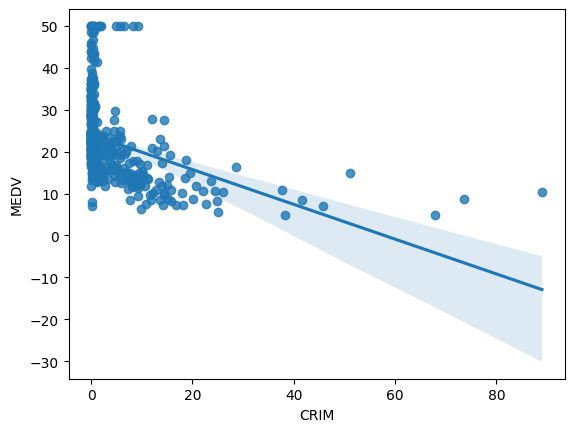

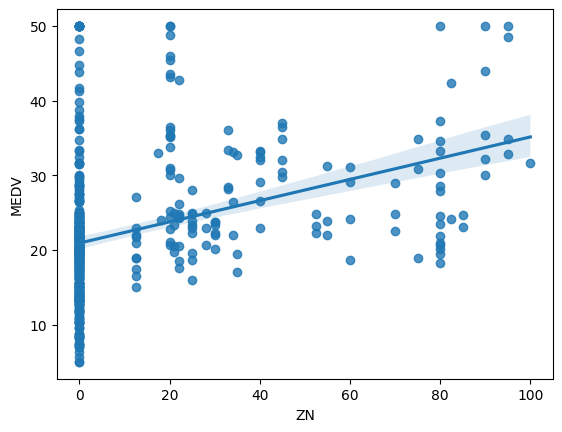

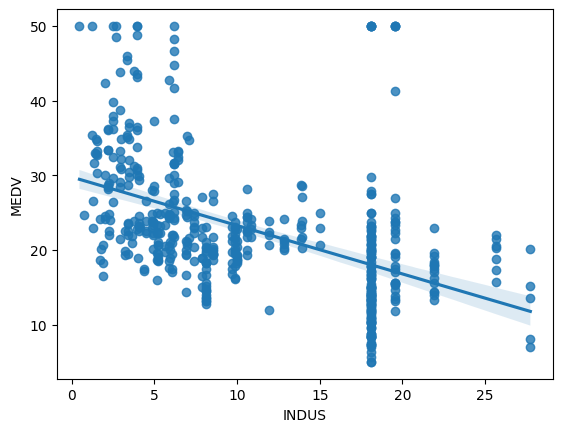

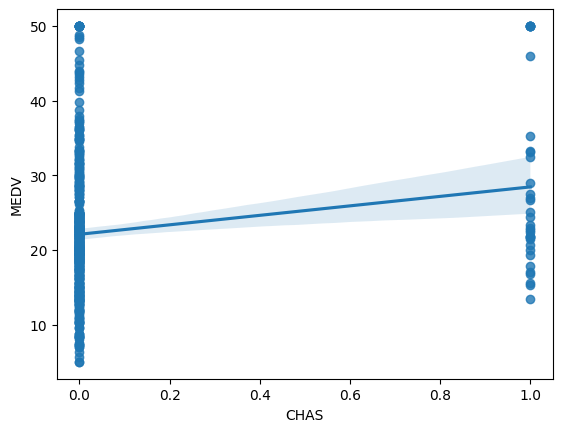

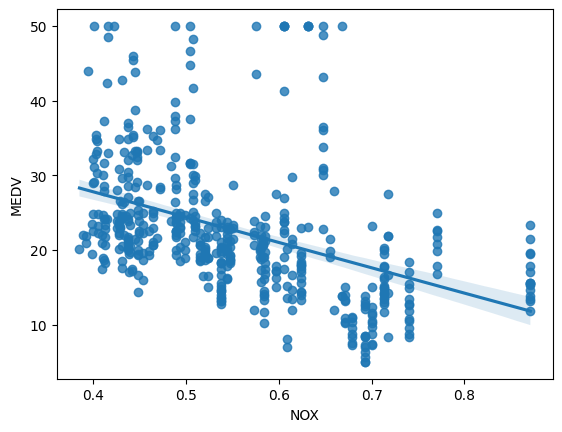

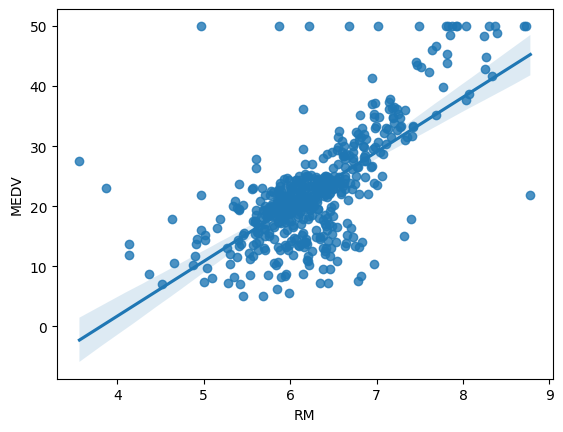

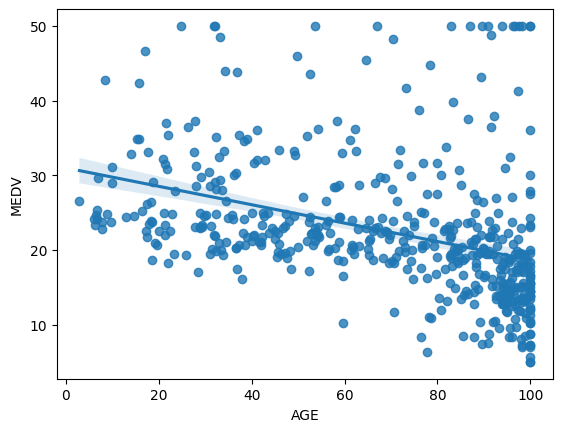

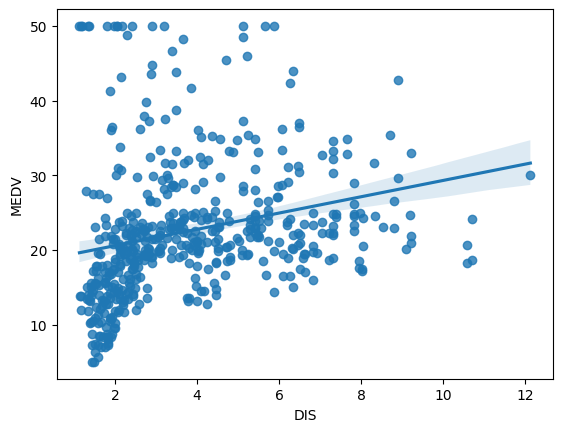

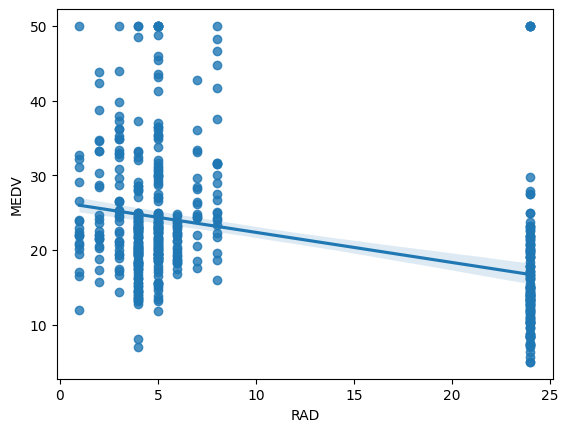

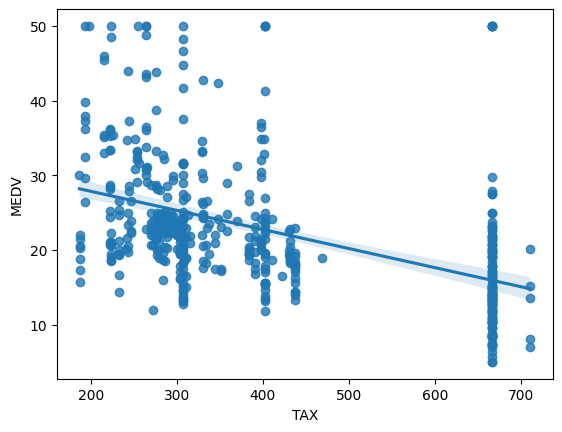

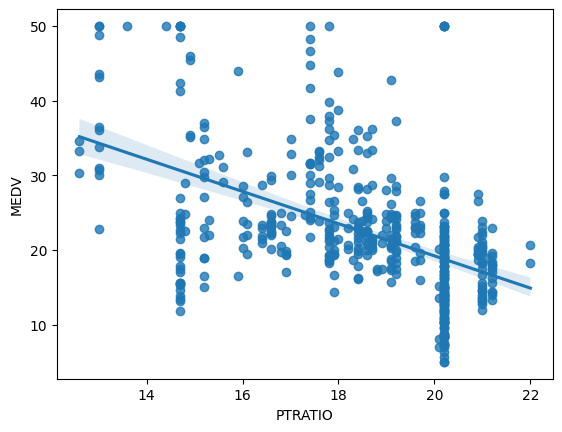

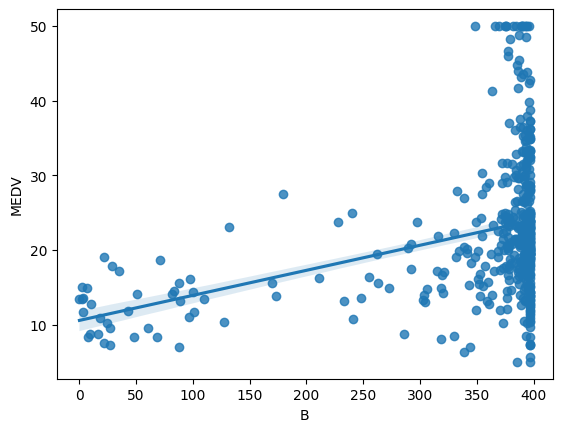

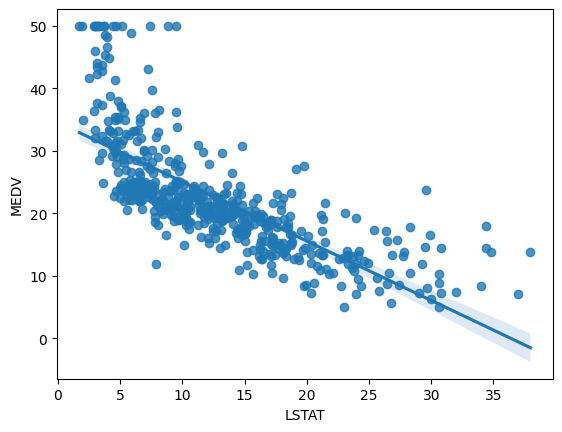

In [16]:
for col in columns[:-1:]:
    sns.regplot(data=boston,y='MEDV',x=col)
    plt.show()
    

In [17]:
data_url

'http://lib.stat.cmu.edu/datasets/boston'

In [18]:
X=boston.iloc(axis=1)[:-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
Y=boston.iloc(axis=1)[-1]
Y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=42)
# random state is one piece of non random seed used to select random data. i.e. 2 sepearate code runs with similar random_state will produce similar type of random train test split

In [21]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [22]:
x_train.shape

(339, 13)

In [23]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
265,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45
29,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98


In [24]:
x_test.shape

(167, 13)

In [25]:
from sklearn.discriminant_analysis import StandardScaler

scalar=StandardScaler()
scalar

StandardScaler()

In [26]:
x_train=scalar.fit_transform(x_train)
x_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

In [27]:
x_test=scalar.transform(x_test) # transform instead of fit transform to avoid data leakage
x_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]])

- **Alternative**- normalize

## Why `transform` instead of `fit_transform` 

##### **Short Answer**
- `scalar.transform` on test_dataset is always done after `scalar.fit_transform` on train_dataset. `scalar.transform` takes the *mean* and *standard deviation* from scalar object created earlier which recieves the mentioned data during the `fit_transform` procedure.
##### **Long Answer**
When you use `fit_transform` on the training dataset, it calculates the scaling parameters (e.g., mean, standard deviation) based on the training data and then applies the scaling to the same training data. This ensures that the training data is transformed in a consistent manner, and the model learns from the correctly scaled features.

On the other hand, when you use `transform` on the test dataset, it only applies the scaling parameters computed from the training dataset to the test data. It does not recompute the scaling parameters based on the test data. This means that the scaling of the test data is done in the same way as the training data, ensuring that the same scaling factors are used for both datasets.

The main reason for avoiding new information during `transform` on the test dataset is to maintain the independence between the training and test datasets. The purpose of the test dataset is to evaluate the performance of the trained model on unseen data, simulating how well the model will perform in the real world. If you were to recompute the scaling parameters based on the test data (by using `fit_transform` on the test data), you would effectively introduce new information about the test dataset into the model.

This new information could lead to overly optimistic performance estimates because the model has indirectly "seen" the test data during the scaling process. Consequently, the evaluation would not accurately reflect the model's ability to generalize to new, unseen data.

By using the same scaling parameters from the training dataset for the test dataset (through `transform`), you ensure that the test dataset remains independent, and the model's performance evaluation is unbiased and closer to its real-world generalization ability.

# Model Training

In [28]:
from sklearn.linear_model import LinearRegression


regeression=LinearRegression()
regeression

LinearRegression()

In [29]:
regeression.fit(x_train,y_train)    # x_train =  IDV & y_train = DV

LinearRegression()

In [30]:
regeression.coef_       # remember we had to set the correct coefficient and correct intercpt to get the best fit line used to predict this is the coefficient for that

array([-0.98858032,  0.86793276,  0.40502822,  0.86183791, -1.90009974,
        2.80813518, -0.35866856, -3.04553498,  2.03276074, -1.36400909,
       -2.0825356 ,  1.04125684, -3.92628626])

In [31]:
regeression.singular_

array([45.3197646 , 22.35115717, 20.74041085, 17.57585495, 16.34686951,
       15.14589008, 13.08369496, 11.47289552,  9.82530409,  8.82746939,
        8.06463006,  7.3186188 ,  4.68824059])

In [32]:
regeression.rank_

13

In [33]:
reg_pred= regeression.predict(x_test)
reg_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

# Assumptions of Linear regression

- The test data value should be positively linear to predicted data. as shown below

<Axes: xlabel='MEDV'>

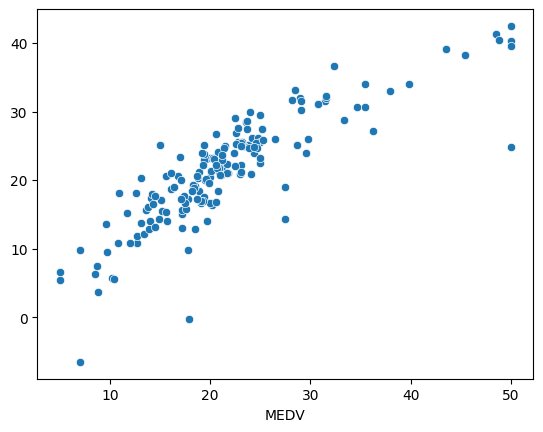

In [34]:
sns.scatterplot(x=y_test,y=reg_pred)

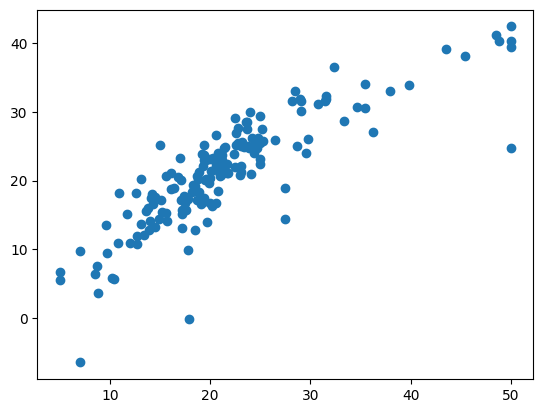

In [35]:
plt.scatter(x=y_test,y=reg_pred)
#

In [36]:
## residual
residual=y_test-reg_pred
residual

173   -4.934695
274   -4.218701
491   -2.037511
72    -2.701450
452   -2.609673
         ...   
110    0.642557
321   -1.917346
265   -4.854619
29     0.297942
262    8.417851
Name: MEDV, Length: 167, dtype: float64

C:\Users\Dvain\AppData\Local\Temp\ipykernel_57312\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='MEDV', ylabel='Density'>

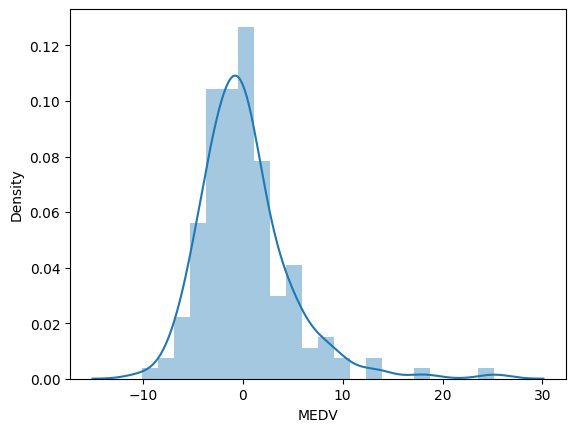

In [37]:
sns.distplot(residual)

- Assumption 2- when creating a distance plot for residuals, it should create a curve of *normal distribution*
**Note- Assumption is used to check the goodness of our machine learning model**

## Scatter plot of residuals and prediction
- Assumption 3- if you create a scatter plot from prediction and residuals it should be uniformly distribuion(i.e. it sho8uld have any kind of shape) - homosedacity

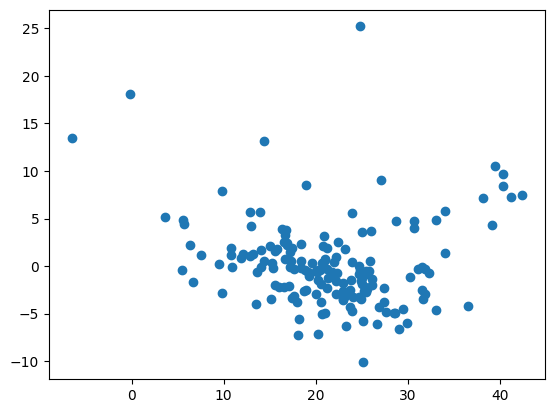

In [38]:
plt.scatter(reg_pred,residual)

## Performance matrics

In [39]:
mse=mean_squared_error(y_test,reg_pred)
mse

20.724023437339753

In [40]:
mae=mean_absolute_error(y_test,reg_pred)
mae

3.148255754816832

In [41]:
rmse=np.sqrt(mse)
rmse

4.552364598463062

## R squared and r squared 

In [42]:
score=r2_score(y_test,reg_pred)
score

0.7261570836552476

In [43]:

adjusted_r_square=1-(1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)
adjusted_r_square

0.7028893848808568

In [44]:
from sklearn.linear_model import Ridge,Lasso

lasso=Lasso()
ridge = Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge()

In [97]:
ridge = Ridge(alpha=0)
ridge.fit(x_train,y_train)
pred_ridged=ridge.predict(x_test)
pred_ridged

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

In [98]:
score=r2_score(y_test,pred_ridged)

1-(1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)

0.7028893848808566

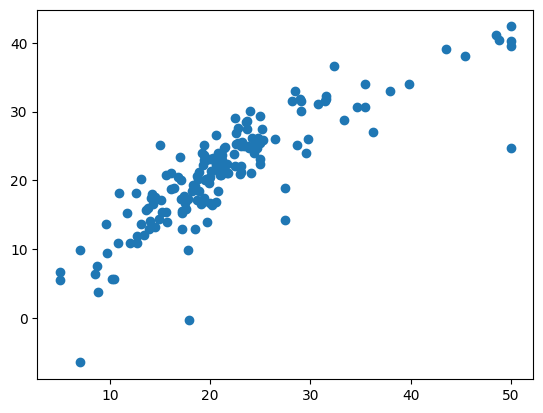

In [46]:
plt.scatter(y_test,pred_ridged)

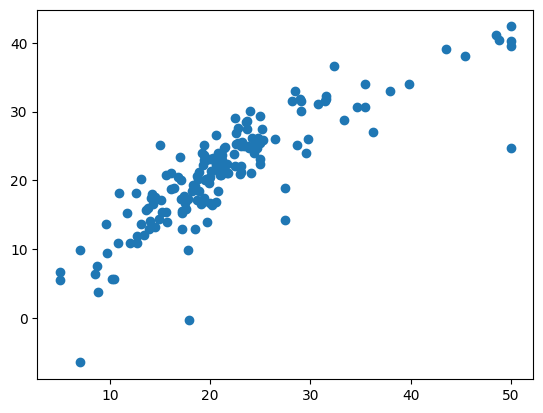

In [47]:
plt.scatter(y_test,pred_ridged)

In [76]:
lsso=Lasso(alpha=0.001)
lsso.fit(x_train,y_train)
pred_lassoed=lsso.predict(x_test)
pred_lassoed

array([28.53568752, 36.60578801, 15.65917527, 25.4966417 , 18.70766174,
       23.16621812, 17.31387565, 14.07910636, 22.99959054, 20.54936682,
       24.90657875, 18.41778041, -6.50630948, 21.83678861, 19.1523496 ,
       26.05018124, 20.27395838,  5.74750688, 40.31716444, 17.45754198,
       27.46459742, 30.202409  , 10.81623874, 23.88016617, 17.9934172 ,
       16.01796221, 23.2683539 , 14.37393027, 22.37985919, 19.3169445 ,
       22.17335424, 25.06091083, 25.13677538, 18.46738801, 16.5951764 ,
       17.47622549, 30.71658107, 20.05248233, 23.98776121, 24.93856   ,
       13.9866033 , 31.63190391, 42.455082  , 17.7082945 , 26.93075008,
       17.15544871, 13.69862387, 26.14458477, 20.26937305, 30.00185914,
       21.21797771, 34.0258101 , 15.42795066, 25.96680473, 39.13228472,
       22.95363027, 18.80215175, 33.05879388, 24.74605922, 12.8430514 ,
       22.4206868 , 30.63670909, 31.58786818, 16.34739615, 20.97501223,
       16.70021999, 20.22881032, 26.14156437, 31.10893209, 11.90

In [77]:
score=r2_score(y_test,pred_lassoed)

1-(1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)

0.7028482840186532